<a href="https://colab.research.google.com/github/juli-ter/Project_SAS/blob/master/1_Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data preparation

First of all we need to import several libraries which will help us to work with table of data that we were given and some libraries will make visualisations. 

In [1]:
import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   
import seaborn as sns             
plt.style.use('ggplot')     

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Read data from the initial .csv file and put it in a DataFrame 

In [27]:
path = "/content/drive/My Drive/Optimisation/"

df = pd.read_csv(path+'исходник0.csv',delimiter=';', encoding= 'cp1251')

Lets have a look what our table inclues and what columns of which type is inside.

In [ ]:
df.head()


,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12 098,12 247,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,АКСЕССУАРЫ ДЛЯ КОЛЯСОК,КГТ,"LEADER KIDS, МУФТА на ручку коляски, (беж),",КГТ,Нет,NaN,1,680,680,172,3,2 017,NaN,Возврат,Москва,508,0,0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0,NaN
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4 819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,Нет,NaN,1,379,379,"209,8",3,2 017,23111,Доставлен,Регионы,"169,2",0,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3 325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,Нет,NaN,1,3 325,3 325,1 149,3,2 017,23111,Доставлен,Регионы,2 176,0,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4 998,4 998,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),ползунки,ОДЕЖДА,"MAMATTI, ПОЛЗУНКИ Elephant, р. 68, Польша",МГТ,Нет,NaN,1,330,330,"166,96",3,2 017,NaN,Доставлен,Москва,"163,04",0,0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,Нет,NaN,1,199,199,79,3,2 017,23111,Доставлен,Регионы,120,0,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691539 entries, 0 to 691538
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Дата                      691539 non-null  object
 1   ДатаДоставки              690913 non-null  object
 2   НомерЗаказаНаСайте        691535 non-null  object
 3   НовыйСтатус               691539 non-null  object
 4   СуммаЗаказаНаСайте        691539 non-null  object
 5   СуммаДокумента            691539 non-null  object
 6   МетодДоставки             691539 non-null  object
 7   ФормаОплаты               691539 non-null  object
 8   Регион                    686397 non-null  object
 9   Группа2                   616853 non-null  object
 10  Группа3                   616853 non-null  object
 11  Группа4                   585914 non-null  object
 12  Тип                       691539 non-null  object
 13  Номенклатура              691539 non-null  object
 14  ТипТ

In [5]:
df.shape

(691539, 38)

Now lets drop duplicates if there are any

In [28]:
df.drop_duplicates()

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12 098,12 247,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,АКСЕССУАРЫ ДЛЯ КОЛЯСОК,КГТ,"LEADER KIDS, МУФТА на ручку коляски, (беж),",КГТ,Нет,NaN,1,680,680,172,3,2 017,NaN,Возврат,Москва,508,0,0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0,NaN
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4 819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,Нет,NaN,1,379,379,"209,8",3,2 017,23111,Доставлен,Регионы,"169,2",0,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3 325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,Нет,NaN,1,3 325,3 325,1 149,3,2 017,23111,Доставлен,Регионы,2 176,0,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4 998,4 998,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),ползунки,ОДЕЖДА,"MAMATTI, ПОЛЗУНКИ Elephant, р. 68, Польша",МГТ,Нет,NaN,1,330,330,"166,96",3,2 017,NaN,Доставлен,Москва,"163,04",0,0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,Нет,NaN,1,199,199,79,3,2 017,23111,Доставлен,Регионы,120,0,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691534,17.04.2017 9:54,24.05.2017 0:00,4411156_TR,Принят в ПВЗ,3 240,3 240,Магазины,Безналичная,Чита,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КОЛЯСКИ КИТАЙ,КГТ,"BABYHIT, КОЛЯСКА (син/черн)",КГТ,Нет,NaN,1,3 240,3 240,2 700,4,2 017,23111,В процессе,Регионы,540,0,0,1,1,17.04.2017 0:00,55574952-51535652495475,guest_103117_gu28@workmail.ru,Гость,IDL00040855553,0,NaN
691535,17.04.2017 10:10,19.04.2017 0:00,4411268_TR,Доставлен,1 377,1 377,Магазины,Безналичная,Москва,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,прочие игрушки для развития,ИГРУШКИ,"TOMY LAMAZE, КНИЖКА- шуршалка Пират Пит",МГТ,Нет,NaN,1,464,464,"324,8",4,2 017,GL0285876,Доставлен,Москва,"139,2",49,49,2,1,17.04.2017 0:00,55575054-53545152544971,guest_103117_gu28@workmail.ru,Гость,IDL00013484149,0,NaN
691536,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1 098,2 086,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,щетки зубные,ППКП,"CS MEDICA, НАСАДКА для зубной щетки SonicPulsa...",МГТ,Нет,NaN,1,249,249,207,4,2 017,GL0285876,Доставлен,Регионы,42,0,0,1,1,17.04.2017 0:00,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050250,0,NaN
691537,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1 098,2 086,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,щетки зубные,ППКП,"CS MEDICA, ЩЕТКА зубная эл. SonicPulsar CS-562...",МГТ,Нет,NaN,1,849,849,705,4,2 017,GL0285876,Доставлен,Регионы,144,0,0,2,1,17.04.2017 0:00,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050654,0,

In [ ]:
df.shape

(691539, 38)

The number of rows hasn't changed, so there were no dublicates. Now lets have a look on empty values. We will visualise it. On the picture below we can see 38 strips for each column. The purpule color shows non-empty cells and yellow - empty. Columns "ПричинаОтмены", "ПВЗ_код" and "МагазинЗаказа" are almost fully empty. So, we will drop this columns

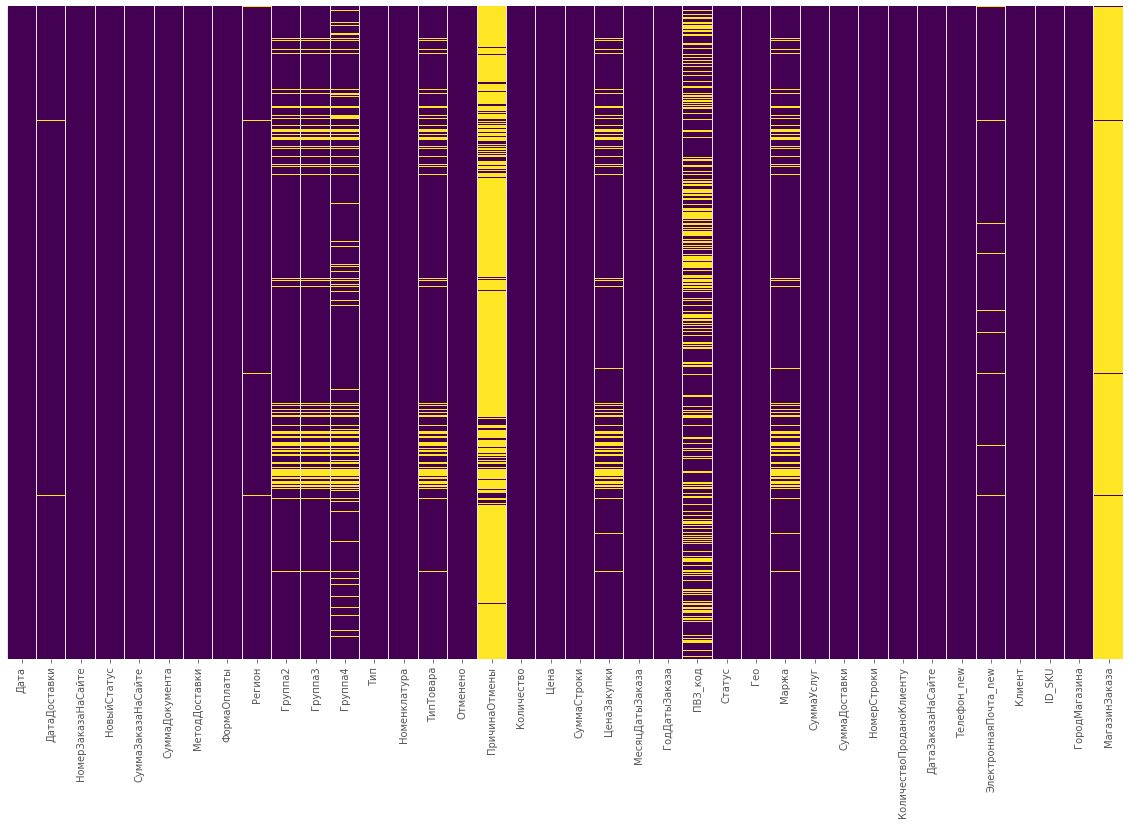

In [7]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [29]:
df.drop(['ПричинаОтмены', 'МагазинЗаказа', 'ПВЗ_код'], axis='columns', inplace=True)

In [9]:
df.head

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12 098,12 247,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,АКСЕССУАРЫ ДЛЯ КОЛЯСОК,КГТ,"LEADER KIDS, МУФТА на ручку коляски, (беж),",КГТ,Нет,1,680,680,172,3,2 017,Возврат,Москва,508,0,0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4 819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,Нет,1,379,379,"209,8",3,2 017,Доставлен,Регионы,"169,2",0,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3 325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,Нет,1,3 325,3 325,1 149,3,2 017,Доставлен,Регионы,2 176,0,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4 998,4 998,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),ползунки,ОДЕЖДА,"MAMATTI, ПОЛЗУНКИ Elephant, р. 68, Польша",МГТ,Нет,1,330,330,"166,96",3,2 017,Доставлен,Москва,"163,04",0,0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,Нет,1,199,199,79,3,2 017,Доставлен,Регионы,120,0,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0


In [12]:
df.shape

(691539, 35)

As we can see there are also many rows that are missing many important values. So, we will also drop rows with more than 6 empty parameters.

In [30]:
df = df.dropna(axis = 0, thresh = 30)

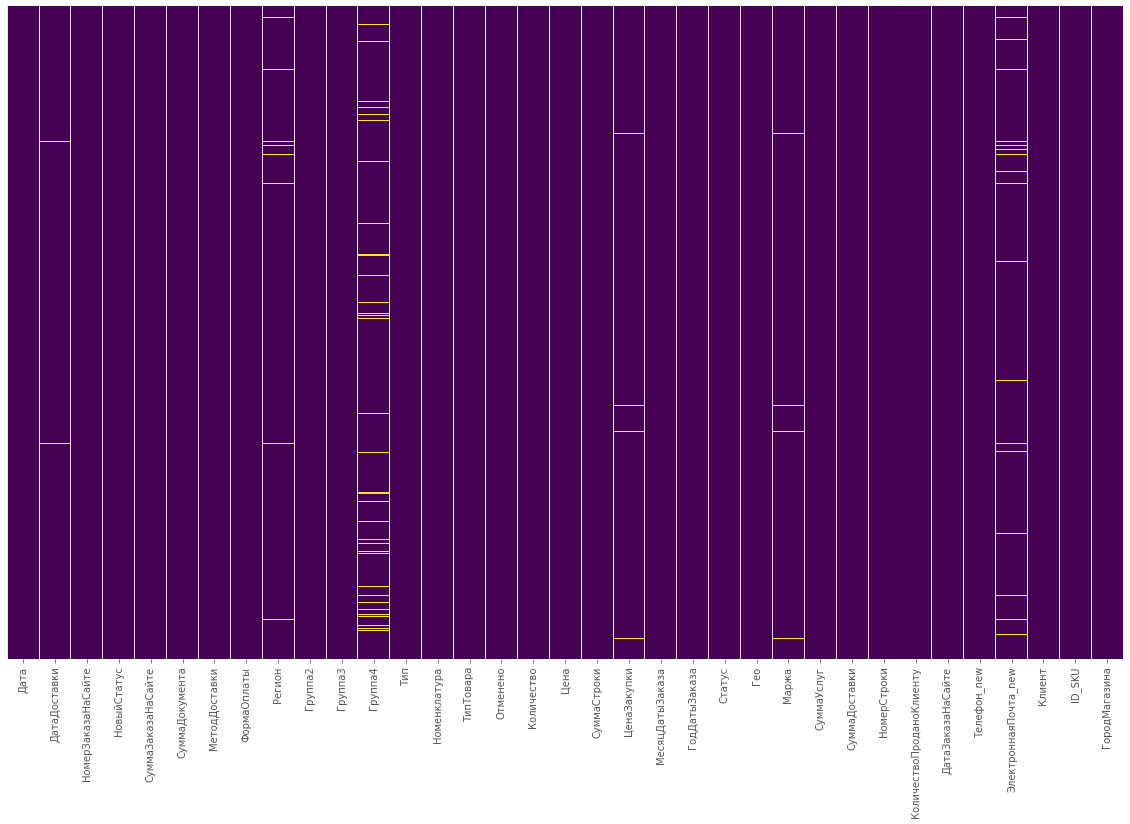

In [16]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Now there are not so many empty cells in our DataFrame.

In [17]:
df.shape

(616849, 35)

Next step is to check whether the type of data in each column corresponds its type logicaly

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616849 entries, 0 to 691538
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Дата                      616849 non-null  object
 1   ДатаДоставки              616230 non-null  object
 2   НомерЗаказаНаСайте        616849 non-null  object
 3   НовыйСтатус               616849 non-null  object
 4   СуммаЗаказаНаСайте        616849 non-null  object
 5   СуммаДокумента            616849 non-null  object
 6   МетодДоставки             616849 non-null  object
 7   ФормаОплаты               616849 non-null  object
 8   Регион                    611798 non-null  object
 9   Группа2                   616849 non-null  object
 10  Группа3                   616849 non-null  object
 11  Группа4                   585910 non-null  object
 12  Тип                       616849 non-null  object
 13  Номенклатура              616849 non-null  object
 14  ТипТ

As we can see most of columns have type 'object'. This type does not suits columns with numeric values. The reason for it is that in intiatial file thousandths are separated with other digits of numbers by spaces. In addition to this, decimal part of numbers is separates with commas. We need to delite spases and replace commas with points. After this actions we can change the type of the columns and get float64 type.

In [31]:
numeric_columns = ['СуммаЗаказаНаСайте', 'Цена', 'Маржа', 'СуммаУслуг', 'СуммаСтроки']

In [32]:
for column in numeric_columns:
    df[column] = df[column].replace(r'\s+','',regex=True)
    df[column] = df[column].replace(',','.',regex=True)
    df[column] = df[column].apply(pd.to_numeric)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616849 entries, 0 to 691538
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Дата                      616849 non-null  object 
 1   ДатаДоставки              616230 non-null  object 
 2   НомерЗаказаНаСайте        616849 non-null  object 
 3   НовыйСтатус               616849 non-null  object 
 4   СуммаЗаказаНаСайте        616849 non-null  int64  
 5   СуммаДокумента            616849 non-null  object 
 6   МетодДоставки             616849 non-null  object 
 7   ФормаОплаты               616849 non-null  object 
 8   Регион                    611798 non-null  object 
 9   Группа2                   616849 non-null  object 
 10  Группа3                   616849 non-null  object 
 11  Группа4                   585910 non-null  object 
 12  Тип                       616849 non-null  object 
 13  Номенклатура              616849 non-null  o

In [22]:
df = df[(df['НовыйСтатус'] == 'Доставлен') & (df['Отменено'] == 'Нет') & (df['КоличествоПроданоКлиенту'] > 0) & (df['Телефон_new'] != '0')]
df.rename(columns={'СуммаСтроки': 'Revenue', 'Маржа': 'Marge'}, inplace=True)

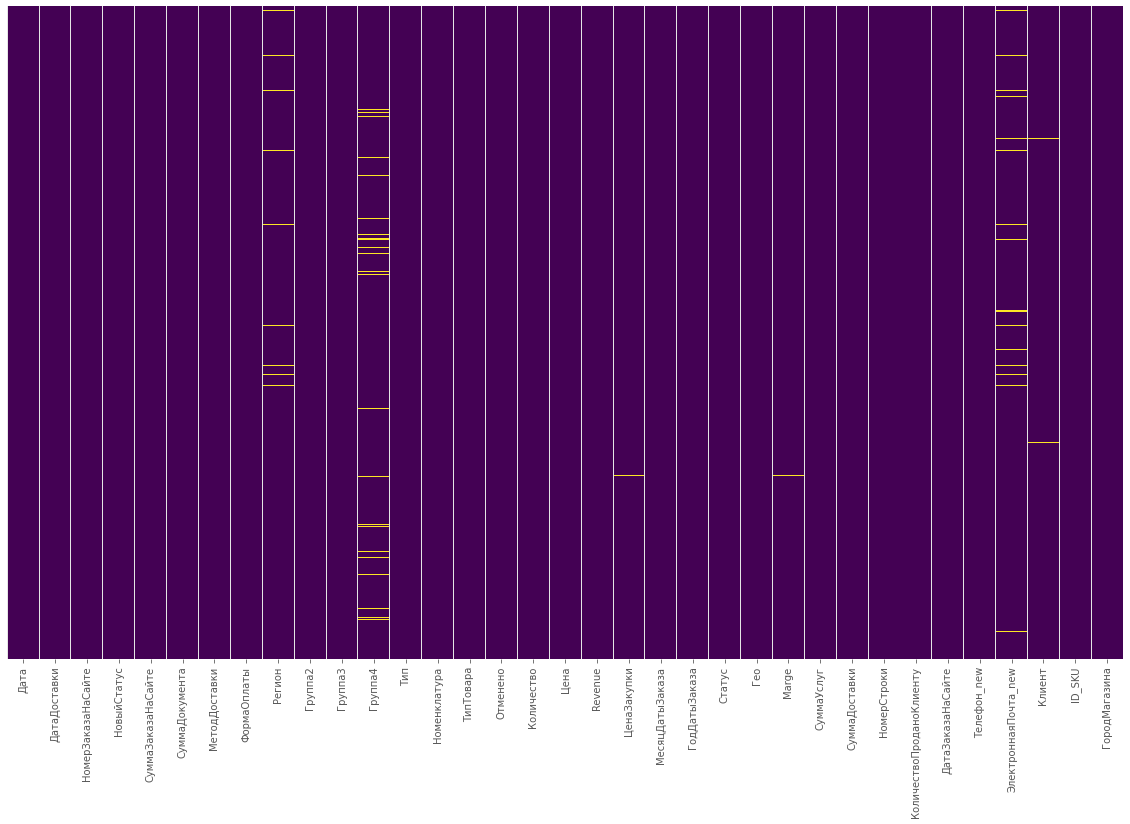

In [23]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [24]:
df.shape

(214455, 35)

In [25]:
df['Revenue'].sum()

231431823.20000002

In [26]:
df['Marge'].sum()

52277156.050000004

Now, we will save this DataFrame in a new csv file and will work with this new file

In [ ]:
#df.to_csv('clean_data_final01.csv')
df.to_csv(path+'clean_data_final01.csv')

In [ ]:
df.rename(columns={'СуммаСтроки': 'Revenue', 'Маржа': 'Marge', }, inplace=True)
df_by_bills = df[['НомерЗаказаНаСайте', 'Revenue', 'Marge', 'Количество']].groupby('НомерЗаказаНаСайте').aggregate(sum)
df_by_bills = df_by_bills.fillna(0)

In [ ]:
df_data = df[['Дата','НомерЗаказаНаСайте']].drop_duplicates()

In [ ]:
df_by_bills = df_by_bills.merge(df_data, how='right', on='НомерЗаказаНаСайте')
df_by_bills

,НомерЗаказаНаСайте,Revenue,Marge,Количество,Дата
0,1303000313_TR,247.0,63.08,1,04.03.2017 9:53
1,1303000319_TR,13300.0,3246.00,1,16.03.2017 12:58
2,1303000321_TR,16150.0,4436.07,1,18.03.2017 18:22
3,1303000323_TR,4180.0,1345.00,1,23.03.2017 20:01
4,1303000324_TR,18500.0,3400.00,1,24.03.2017 10:06
...,...,...,...,...,...
75074,4513463_TR,1932.0,429.28,4,30.04.2017 23:48
75075,4513474_TR,2002.0,558.57,10,30.04.2017 23:53
75076,4513480_TR,4864.0,910.86,2,30.04.2017 23:58
75077,4513486_TR,1436.0,-118.60,3,30.04.2017 23:58


In [ ]:
date = [] 
hours = []
weekdays = []
for item in df_by_bills['Дата']:
    
    x =  pd.to_datetime(item, format="%d.%m.%Y %H:%M")
    a = x.timetuple()
    hours.append(a[3])
    weekdays.append(a[6])
    date.append(x.replace(minute=0, hour =0))
    

df_by_bills['Date'] = date
df_by_bills['Hours'] = hours
df_by_bills['Weekday'] = weekdays

In [ ]:
df_by_bills

,НомерЗаказаНаСайте,Revenue,Marge,Количество,Дата,Date,Hours,Weekday
0,1303000313_TR,247.0,63.08,1,04.03.2017 9:53,2017-03-04,9,5
1,1303000319_TR,13300.0,3246.00,1,16.03.2017 12:58,2017-03-16,12,3
2,1303000321_TR,16150.0,4436.07,1,18.03.2017 18:22,2017-03-18,18,5
3,1303000323_TR,4180.0,1345.00,1,23.03.2017 20:01,2017-03-23,20,3
4,1303000324_TR,18500.0,3400.00,1,24.03.2017 10:06,2017-03-24,10,4
...,...,...,...,...,...,...,...,...
75074,4513463_TR,1932.0,429.28,4,30.04.2017 23:48,2017-04-30,23,6
75075,4513474_TR,2002.0,558.57,10,30.04.2017 23:53,2017-04-30,23,6
75076,4513480_TR,4864.0,910.86,2,30.04.2017 23:58,2017-04-30,23,6
75077,4513486_TR,1436.0,-118.60,3,30.04.2017 23:58,2017-04-30,23,6


In [ ]:
df_by_bills.to_csv(path+'clean_data_drouped_by_bills.csv')